# Neural & Behavioral Modeling - Week 4 (Exercises)
by Chi-Lin Yu (psychilinyu@gmail.com)

In [ ]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
import random
from sklearn.decomposition import PCA
from sklearn import preprocessing

def plot_rst(rst,numplay,tit):
    A = rst[:,0]+(np.random.random((1,numplay))-.5)*.1
    X_scaled = (A - mean(A))/std(A)
    B = rst[:,1]+(np.random.random((1,numplay))-.5)*.1
    Y_scaled = (B - mean(B))/std(B)
    clf() # clear previous figure
    plot(X_scaled,Y_scaled,'ro')
    #xmi = min(rst[:,0])-0.1
    #xma = max(rst[:,0])+0.1
    #ymi = min(rst[:,1])-0.1
    #yma = max(rst[:,1])+0.1
    xlim([-3.5,3.5])
    ylim([-3.5,3.5])
    #xlim([-1.5,1.5])
    #ylim([-1.5,1.5])
    #axis('scaled')
    gca().set_aspect('equal', adjustable='box')
    title(tit)
    xticks([])
    yticks([])
    display(gcf()); clear_output(wait=True)

## 1 Replicate exisiting findings/models 
Based on your personal interest, please choose and replicate ONE of the following studies:

1. <a href="http://ccl.northwestern.edu/netlogo/models/FlockingVeeFormations">Flocking Vee Formations</a> in NetLogo's [Sample Models::Biology] 

2. <a href="http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation">Wolf-Sheep Predation</a> in NetLogo's [Sample Models::Biology] 

3. <a href="https://www.wetalk.tw/thread-36278-1-1.html">MIT Matching Game</a>

4. Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). <a href="http://www.mpmlab.org/groups/">The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations</a>. Psychological Science, 25(4), 982-990.

5. Luhmann, C. C., & Rajaram, S. (2015). <a href="http://journals.sagepub.com/doi/abs/10.1177/0956797615605798">Memory transmission in small groups and large networks: An agent-based model</a>. Psychological Science, 26(12), 1909-1917.

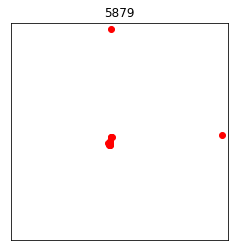

In [ ]:
### Model Parameters:
numplay = 12 # numplay = number of players in the game
numrounds = 10000 # numrounds = the number of generations
setpoint = .5 # setpoint =the probability of interaction where we start everyone at.
#Anything higher than the setpoint is seen as being "closer" to someone,
#whereas anything further away is seen as being "further" from someone.
#Value: .50, which is indifference or neither close nor far)                                                                      
A = 0 # A = cooperation adjustment: influences the probability of coop/defection (range:-1 to 1, though most meaningful between -.2 to .2.
r = 3 # r = the reciprocity coefficient: players move closer after cooperating/further after defecting (range: 1 - infinity)
t = 2# t = the transitivity coefficient: players move closer/further to the friends/enemies of another player after an instance of mutual cooperation (1 - infinity).
graphrounds = 10 # graphrounds = the number of rounds that a graph appears for


# Payoffs: prisoner's dilemma payoffs for each strategy.  
# First word is what the first person decides to do.  Second is what the second person decides to do.
coopcoop = 1
coopdefect = -3
defectdefect = -1
defectcoop = 3;
 
#Closenss Matrix: Probx = the matrix of interaction probabilities (i.e., closeness values).  
# First established as a uniform and symmetric matrix of setpoint values, with zeroes on the diagonal.
Probx = np.full([numplay,numplay],1)*0.5
np.fill_diagonal(Probx , 0)

# Payoff Matrix: Payx = total payoff matrix from interactions of coop and defecting, initialize  matrix as all zeroes
Payx = np.zeros((1,numplay))
 
### Simulation
 
# loop for number of generations
for rounds in range(numrounds): # evey time only randomly select two people
    
    # 1. Probability of interaction.
    
    # in the matrix of players, select two players to play with each other from row n and column m of the matrix
    n = random.randint(0,numplay - 1) # need n from 0 to 11 (exactly 1~12)
    m = random.randint(0,numplay - 2) # need m from 0 to 10 (exactly 1~11)
    # n = ceil(rand*numplay);
    # m = ceil(rand*(numplay-1));
    
    # Because you cannot play with oneself, if the row and column equal each other, we add 1 to m.  The m function above is numplay-1 because we don't want adding 1 to go beyond the number of players.
    if m>=n:
        m=m+1
    
    #n and m have been matched up, but they are more likely to interact if they are closer to each other.  
    # Closeness--Probx(n,m)--is isomorphic with the probability of interaction, ProbInt.
    ProbInt = Probx[n,m]
        
    # the higher Probx(n,m) the more likley n and m are to interact.
    # A random number is drawn and if ProbInt is higher than this number, they interact.  
    # If it is lower, then a new pair of players are chosen.
    if ProbInt > round(random.random(),2):
        
        # 2. Interaction behavior and payoffs
        
        # player n; 0 = defect, 1 = cooperate.
        if ProbInt > round(random.random(),2) - A:
            pnstr = 1  # pnstr = player n's strategy.
        else:
            pnstr = 0
         
        # player m; 0 = defect, 1 = cooperate.
        if ProbInt > round(random.random(),2) - A:
            pmstr = 1  # pmstr = player m's strategy.
        else:
            pmstr = 0
        
        # Calculate prisoner's dilemma payoffs according to the values defined above.
        if pnstr == 0 and pmstr == 0:
            Payx[0,m] = Payx[0,m] + defectdefect
            Payx[0,n] = Payx[0,n] + defectdefect
        elif pnstr == 0 and pmstr == 1:
            Payx[0,n] = Payx[0,n] + defectcoop
            Payx[0,m] = Payx[0,m] + coopdefect
        elif pnstr == 1 and pmstr == 0:
            Payx[0,n] = Payx[0,n] + coopdefect
            Payx[0,m] = Payx[0,m] + defectcoop
        elif pnstr == 1 and pmstr == 1:
            Payx[0,m] = Payx[0,m] + coopcoop
            Payx[0,n] = Payx[0,n] + coopcoop
            
        # 3. Reciprocity-moving closer or further from partners (r)        
        if pnstr == 1 and pmstr == 1:
            Probx[n,m]  =  1 - (1 - ProbInt)/r
            Probx[m,n] = Probx[n,m]
        elif pmstr == 0 and pnstr == 0:
            Probx[n,m] =  ProbInt/r
            Probx[m,n] = Probx[n,m]
            
        # 4. Transitivity (t)
        if pnstr == 1 and pmstr == 1:
            for g in range(numplay): # 0~numplay-1
                if g!=n and g!=m:
                    #if player n has stronger feelings than player m, about player g, then they provide the greater influence.
                    if abs(Probx[n,g] - setpoint) > abs(Probx[m,g]  - setpoint):
                        if Probx[n,g] > setpoint:
                            Probx[m,g] = 1 - (1 - Probx[m,g])/t
                            Probx[g,m] = Probx[m,g]
                        elif Probx[n,g] < setpoint:
                            Probx[m,g] = Probx[m,g]/t
                            Probx[g,m] = Probx[m,g]

                    elif abs(Probx[m,g]  - setpoint) > abs(Probx[n,g] - setpoint):
                        if Probx[m,g] > setpoint:
                            Probx[n,g] = 1 - (1 - Probx[n,g])/t
                            Probx[g,n] = Probx[n,g]
                        elif Probx[m,g] < setpoint:
                            Probx[n,g] = Probx[n,g]/t
                            Probx[g,n] = Probx[n,g]
    pca=PCA(n_components=2)
    results=pca.fit_transform(Probx)
    plot_rst(results,numplay,str(rounds))       

In [ ]:
#Show the final Closenss matrix
print(Probx)

In [ ]:
 
#To calculate clustering, make a clustering matrix and add a small amount
#of jitter to each cell so that all starting positions (.5) don't all round up to 1.
ClusterMatrix = Probx;
for g in range(numplay):
    for h in range(numplay):
        ClusterMatrix[g,h]= ClusterMatrix[g,h] + ((random.random()-.5)/1000);
#print(ClusterMatrix)

In [ ]:
ClusterMatrix=np.round(ClusterMatrix)
print(np.matmul(np.matmul(ClusterMatrix, ClusterMatrix),ClusterMatrix))
#the clustering coefficient (ClusteringCoeff) is the ratio of closed triplets
#(numerator)over the number of total triplets (denominator)
Numerator=np.trace(np.matmul(ClusterMatrix, ClusterMatrix,ClusterMatrix))
print(Numerator)
Denominator=sum(sum(np.matmul(ClusterMatrix, ClusterMatrix)))-np.trace(np.matmul(ClusterMatrix, ClusterMatrix))
print(Denominator)
if Denominator == 0: #can't divide by zero.
    #If there are no triplets, there can be no clustering and so it will be zero.
    ClusterCoeff=0
else:
    #this is the clustering coefficient
    ClusterCoeff=Numerator/Denominator
print(ClusterCoeff)

#to calculate average payoff, take the mean of the payoff matrix (Payx),
#and multiply by the number of players, and divide by the number of rounds
#and the number of players in a round (i.e., 2)
AveragePayoff=mean(Payx)*numplay/(numrounds*2)
print(AveragePayoff)